In [2]:
# 读取KDD Cup网络入侵数据kddcup.data_10_percent
import pandas as pd

In [3]:
data=pd.read_csv('/kaggle/input/kddcupdata/kddcup.data_10_percent.csv',header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
# 将非数值字段转码
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in range(1,4):
    data[i]=le.fit_transform(data[i])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
# 要求将类别标签中各种攻击类型，修改为“异常”类别，数据集转换为“正常”和“异常”两个类别。
# 1.将类别标签中各种攻击类型，修改为“异常”类别

data[41]=data[41].replace(['back.','buffer_overflow.','ftp_write.','guess_passwd.','imap.','ipsweep.','land.','loadmodule.','multihop.','neptune.','nmap.','perl.','phf.','pod.','portsweep.','rootkit.','satan.','smurf.','spy.','teardrop.','warezclient.','warezmaster.'],'Abnormal')
data[41]=data[41].replace(['normal.'],'normal')
data[41].value_counts()

Abnormal    396743
normal       97278
Name: 41, dtype: int64

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [8]:
# 数据集转换为“正常”和“异常”两个类别。
data[41]=data[41].replace(['Abnormal'],'1')
data[41]=data[41].replace(['normal'],'0')
data[41].value_counts()

1    396743
0     97278
Name: 41, dtype: int64

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


加载数据到变量X中，X=预处理并去除类别标签后的数据。类别标签仅用于模型评估


In [10]:
# 加载数据到变量X中，X=预处理并去除类别标签后的数据。类别标签仅用于模型评估
X=data.drop([41],axis=1)
y=data[41]

In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 41, dtype: object

分别使用Isolation Forest算法和Local Outlier Factor算法，训练模型，并输出预测结果y_pred，

In [13]:
# 分别使用Isolation Forest算法和Local Outlier Factor算法，训练模型，并输出预测结果y_pred，
# 评估模型性能，输出模型的精度、召回率、F1值、ROC曲线、AUC值等评价指标。

# 使用Isolation Forest算法
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,roc_curve,auc

# 训练模型
clf=IsolationForest(max_samples=100,random_state=42)
clf.fit(X)

IsolationForest(max_samples=100, random_state=42)

In [14]:
# 预测结果
y_pred=clf.predict(X)
y_pred

array([-1,  1,  1, ..., -1, -1, -1])

In [15]:
# 看y_pred的数据分布
pd.Series(y_pred).value_counts()

 1    382747
-1    111274
dtype: int64

In [16]:
y.value_counts()

1    396743
0     97278
Name: 41, dtype: int64

In [17]:
#把-1改成0 1改成1
y_pred=pd.Series(list(map(lambda x:1 if x==0 else 1,y_pred)))

In [18]:
# 解决y_pred和y的索引不一致的问题
y_pred.index=range(y_pred.shape[0])

In [19]:
# 解决下面报错：Labels in y_true and y_pred should be of the same type. Got y_true=['0' '1'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.
y=y.astype('int')

In [20]:
# 计算错误率
import numpy as np

n_error=(y_pred!=y).sum()
print('Isolation Forest算法错误率：',n_error/len(y))

Isolation Forest算法错误率： 0.19691065764410826


In [21]:
# 评估模型性能
print(classification_report(y,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     97278
           1       0.80      1.00      0.89    396743

    accuracy                           0.80    494021
   macro avg       0.40      0.50      0.45    494021
weighted avg       0.64      0.80      0.72    494021



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# 使用 Local Outlier Factor算法
from sklearn.neighbors import LocalOutlierFactor

# 训练模型
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
clf.fit(X)

LocalOutlierFactor(contamination=0.1)

In [23]:
# 预测结果
y_pred=clf.fit_predict(X)
y_pred

array([-1,  1,  1, ...,  1,  1, -1])

In [24]:
# 看y_pred的数据分布
pd.Series(y_pred).value_counts()

 1    444619
-1     49402
dtype: int64

In [25]:
# 将-1改成0，1改成1
y_pred=pd.Series(list(map(lambda x:1 if x==1 else 0,y_pred)))

In [26]:
# 计算错误率
n_error=(y_pred!=y).sum()
print('Local Outlier Factor算法错误率：',n_error/len(y))

Local Outlier Factor算法错误率： 0.2150353932322715


              precision    recall  f1-score   support

           0       0.41      0.21      0.28     97278
           1       0.83      0.93      0.87    396743

    accuracy                           0.78    494021
   macro avg       0.62      0.57      0.57    494021
weighted avg       0.74      0.78      0.76    494021



In [ ]:
# 对于模型进行评估
print(classification_report(y,y_pred))

对于模型进行改进

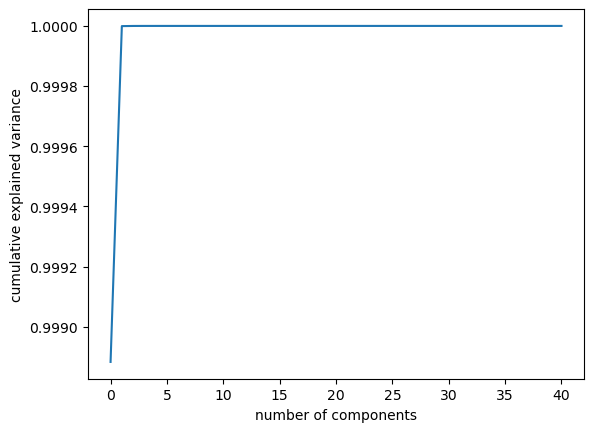

In [29]:
#画出关系相关性热力图
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

In [30]:
# Explained variance (how important each additional principal component is)
from sklearn.decomposition import PCA
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()  

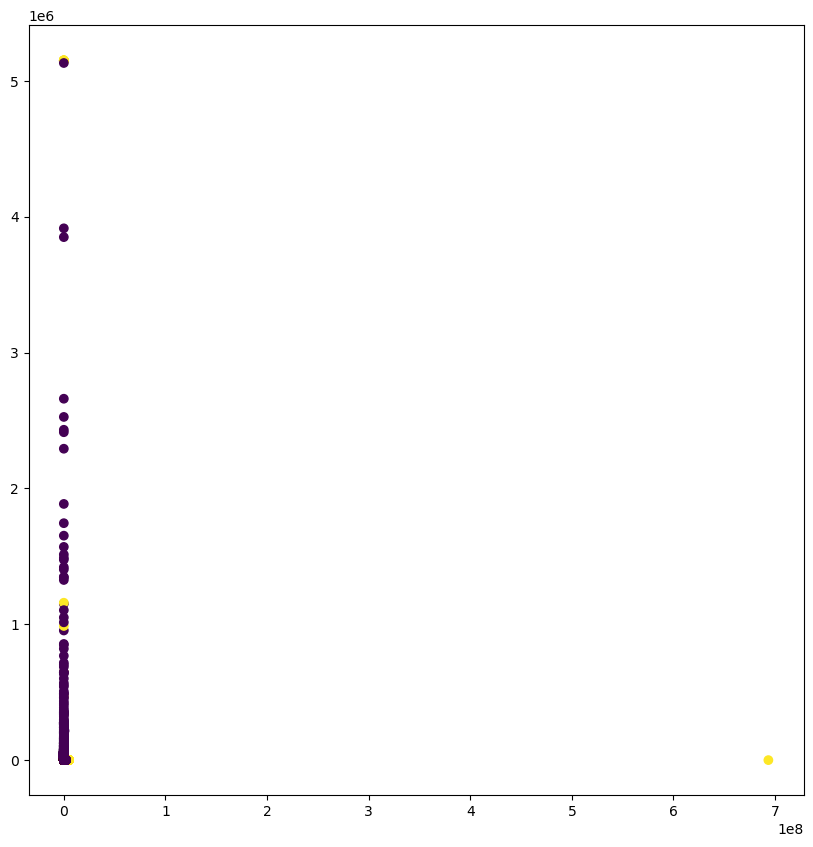

In [31]:
# 主成分分析
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)


In [33]:
# 主成分分析结果可视化
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.show()

        0   1   2   3    4     5   6   7   8   9   ...  31   32   33   34  \
0        0   1  22   9  181  5450   0   0   0   0  ...   9    9  1.0  0.0   
1        0   1  22   9  239   486   0   0   0   0  ...  19   19  1.0  0.0   
2        0   1  22   9  235  1337   0   0   0   0  ...  29   29  1.0  0.0   
3        0   1  22   9  219  1337   0   0   0   0  ...  39   39  1.0  0.0   
4        0   1  22   9  217  2032   0   0   0   0  ...  49   49  1.0  0.0   
...     ..  ..  ..  ..  ...   ...  ..  ..  ..  ..  ...  ..  ...  ...  ...   
494016   0   1  22   9  310  1881   0   0   0   0  ...  86  255  1.0  0.0   
494017   0   1  22   9  282  2286   0   0   0   0  ...   6  255  1.0  0.0   
494018   0   1  22   9  203  1200   0   0   0   0  ...  16  255  1.0  0.0   
494019   0   1  22   9  291  1200   0   0   0   0  ...  26  255  1.0  0.0   
494020   0   1  22   9  219  1234   0   0   0   0  ...   6  255  1.0  0.0   

          35    36    37    38   39   40  
0       0.11  0.00  0.00  0.00  

In [34]:
print(X)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [61]:
X.head()

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_we

{'max_samples': 100}

In [63]:
# 对于IsoForest算法进行调参
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

# 创建自定义的评分函数
scorer = make_scorer(roc_auc_score)

param_grid = {'max_samples': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, cv=5, scoring=scorer)
grid_search.fit(X, y)

grid_search.best_params_

IsolationForest(max_samples=2000, random_state=42)

In [64]:
# max_samples=100时，错误率最低
# 训练模型
clf=IsolationForest(max_samples=2000,random_state=42)
clf.fit(X)

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
# 预测结果
y_pred=clf.predict(X)
y_pred

 1    473061
-1     20960
dtype: int64

In [68]:
# 看y_pred的数据分布
pd.Series(y_pred).value_counts()

In [69]:
# 将-1改成0，0改成-1
y_pred=pd.Series(list(map(lambda x:1 if x==0 else 0,y_pred)))

Isolation Forest算法错误率： 0.19691065764410826


In [70]:
# 计算错误率
n_error=(y_pred!=y).sum()
print('Isolation Forest算法错误率：',n_error/len(y))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     97278
           1       0.80      1.00      0.89    396743

    accuracy                           0.80    494021
   macro avg       0.40      0.50      0.45    494021
weighted avg       0.64      0.80      0.72    494021



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 对于模型进行评估
print(classification_report(y,y_pred))

Iso Forest出了点问题，重新试验一下

In [75]:
clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(X)
y_pred = clf.predict(X)

In [76]:
# 将-1改成0，1改成1
y_pred=pd.Series(list(map(lambda x:1 if x==1 else 0,y_pred)))

Isolation Forest算法错误率： 0.1983964244434953


In [77]:
# 计算错误率
n_error=(y_pred!=y).sum()
print('Isolation Forest算法错误率：',n_error/len(y))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53     97278
           1       0.89      0.86      0.87    396743

    accuracy                           0.80    494021
   macro avg       0.69      0.71      0.70    494021
weighted avg       0.81      0.80      0.81    494021



In [ ]:
# 对于模型进行评估
print(classification_report(y,y_pred))

调整参数

In [80]:
clf = IsolationForest(max_samples=1000, random_state=42)
clf.fit(X)
y_pred = clf.predict(X)

In [81]:
# 将-1改成0，1改成1
y_pred=pd.Series(list(map(lambda x:1 if x==1 else 0,y_pred)))

Isolation Forest算法错误率： 0.19380147807481868


In [82]:
# 计算错误率
n_error=(y_pred!=y).sum()
print('Isolation Forest算法错误率：',n_error/len(y))

              precision    recall  f1-score   support

           0       0.52      0.18      0.27     97278
           1       0.83      0.96      0.89    396743

    accuracy                           0.81    494021
   macro avg       0.67      0.57      0.58    494021
weighted avg       0.77      0.81      0.77    494021



In [83]:
# 对于模型进行评估
print(classification_report(y,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_we

{'max_samples': 100}

In [ ]:
# 对于IsoForest算法进行调参
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

# 创建自定义的评分函数
scorer = make_scorer(roc_auc_score)

param_grid = {'max_samples': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, cv=5, scoring=scorer)
grid_search.fit(X, y)

grid_search.best_params_